# Task 1

Text(0.5, 1.0, 'Imported Image')

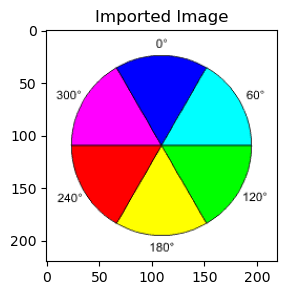

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image as img                  # Pillow library to used import the image.
Input_image = cv2.imread('C:\\Users\\Hp\\Desktop\\CV assignment 1\\Images\\color.png',cv2.IMREAD_COLOR)      # reading the image by giving path.
figure_display_size=(3,3)                     # assigning the display size to the variable.
plt.figure(figsize=figure_display_size)       # ploting the figure size.   
image_plot = plt.imshow(Input_image)          #showing the figure.
plt.title("Imported Image")

### Converting into HSV

### changing the value / brightness value

Text(0.5, 1.0, 'Output Image')

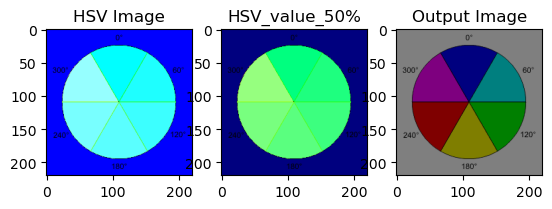

In [149]:

HSV_converted_image = cv2.cvtColor(Input_image, cv2.COLOR_BGR2HSV)      # converting the imported image into HSV
figure_display_size=(6,6)                                               # Figure display sixe is assigned                  
ax = plt.subplot(1,3,1)                                                 # Ploting subplot
plt.imshow(HSV_converted_image)                                         # image showing using plt 
plt.title("HSV Image")                                                  # assigning the image title

hue, saturation, value = cv2.split(HSV_converted_image)                 # spliting the image into Hue, saturation and value
value = np.uint8(value * 0.5)                                           # setting the value = 50%
hsv = cv2.merge((hue, saturation, value))                               # merging back values
figure_display_size=(6,6)                                               # Figure display sixe is assigned 
ax = plt.subplot(1,3,2)                                                 # Ploting subplot
plt.imshow(hsv)               
plt.title("HSV_value_50%")                                              # assigning the image title

output = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)                           # coverting back the HSV image into BGR
figure_display_size=(6,6) 
ax = plt.subplot(1,3,3)
plt.imshow(output)
plt.title("Output Image")





# Task 2

Text(0.5, 1.0, 'Imported_cameraman_Image')

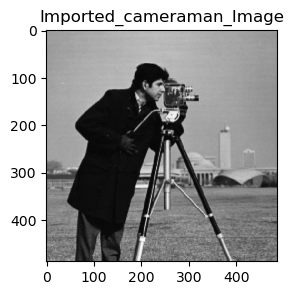

In [150]:
cameraman_Input_image = cv2.imread('C:\\Users\\Hp\\Desktop\\CV assignment 1\\Images\\cameraman.jpeg',cv2.IMREAD_COLOR)   # reading the image 
figure_display_size=(3,3)                              # assigning the display size to the variable.
plt.figure(figsize=figure_display_size)                # ploting the figure size.   
image_plot = plt.imshow(cameraman_Input_image)          #showing the figure.
plt.title("Imported_cameraman_Image")

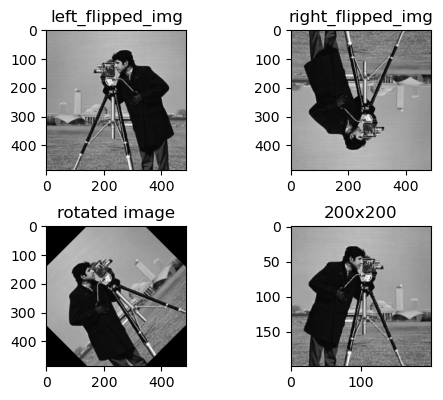

In [151]:
rotate_angle = 45                                              # assigning rotation angle

left_flipped_img = cv2.flip(cameraman_Input_image, 1)          # fliping the image into left
ax = plt.subplot(2,2,1)
plt.title("left_flipped_img")                                  # assigning the image title
plt.imshow(left_flipped_img)

right_flipped_img = cv2.flip(cameraman_Input_image, 0)         # fliping the image into right
ax = plt.subplot(2,2,2)
plt.title("right_flipped_img")                                 # assigning the image title
plt.imshow(right_flipped_img)

# Get the image size
h, w = cameraman_Input_image.shape[:2]
# Calculate the rotation matrix
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, rotate_angle, 1.0)

# Apply the rotation to the image
rotated_img = cv2.warpAffine(cameraman_Input_image, M, (w, h))                     
ax=plt.subplot(2, 2, 3)
plt.imshow(rotated_img)
plt.title('rotated image')                                     # assigning the image title

resized_img = cv2.resize(cameraman_Input_image, (200, 200)) 
ax=plt.subplot(2, 2, 4)
plt.imshow(resized_img)
plt.title('200x200')                                           # assigning the image title

plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.8, wspace=0.2, hspace=0.4)
plt.show()


# Task 3

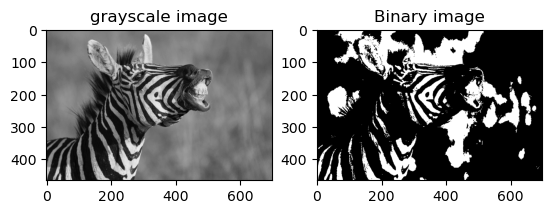

In [152]:
thresh_value = 127
zeb_image = cv2.imread('C:\\Users\\Hp\\Desktop\\CV assignment 1\\Images\\zebra.jpeg',cv2.IMREAD_COLOR)
grayscale_converted_img = cv2.cvtColor(zeb_image, cv2.COLOR_BGR2GRAY)
figure_display_size=(3,3)                   
ax=plt.subplot(1,2,1) 
plt.title('grayscale image')                                                # assigning the image title
plt.imshow(grayscale_converted_img, cmap='gray')
        
ret, thresh = cv2.threshold(grayscale_converted_img, thresh_value, 255, cv2.THRESH_BINARY)
figure_display_size=(3,3)                   
ax=plt.subplot(1,2,2)
plt.title('Binary image')                                                   # assigning the image title
plt.imshow(thresh, cmap='gray')


# Task 4

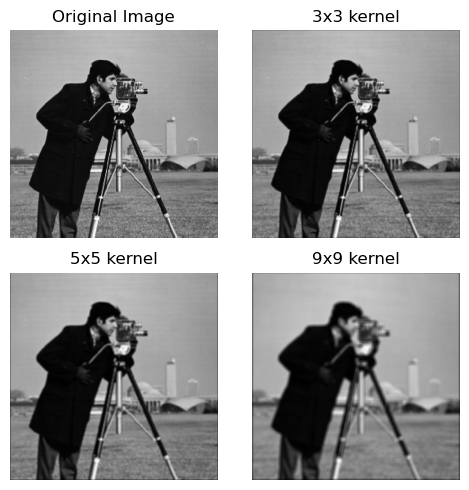

In [153]:
cameraman_img = np.array(Image.open('C:\\Users\\Hp\\Desktop\\CV assignment 1\\Images\\cameraman.jpeg').convert('L')) # Load the image

a,b,c=3, 5, 9
kernel_sizes = [a,b,c]

filtered_images = []
for k in kernel_sizes:
    kernel = np.ones((k,k), np.float32) / (k*k)
    padded_img = np.pad(cameraman_img, pad_width=k//2, mode='constant', constant_values=0)
    filtered_img = np.zeros_like(cameraman_img)
    i = 0
    while i < cameraman_img.shape[0]:
        j = 0
        while j < cameraman_img.shape[1]:
            filtered_img[i,j] = np.sum(kernel * padded_img[i:i+k, j:j+k])
            j += 1
        i += 1
    filtered_images.append(filtered_img)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
ax = axes.flatten()

ax[0].imshow(cameraman_img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

i = 0
while i < len(kernel_sizes):
    k = kernel_sizes[i]
    ax[i+1].imshow(filtered_images[i], cmap='gray')
    ax[i+1].set_title(f'{k}x{k} kernel')
    ax[i+1].axis('off')
    i += 1

plt.tight_layout()
plt.show()

# Task 5


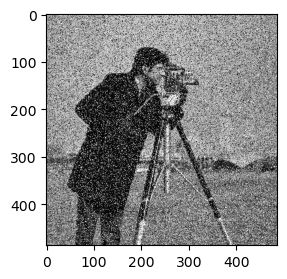

In [154]:

img = np.array(Image.open('C:\\Users\\Hp\\Desktop\\CV assignment 1\\Images\\cameraman.jpeg').convert('L'))
height, width = img.shape
noise_percentage = 30
num_noisy_pixels = int((noise_percentage / 100.0) * (height * width))
noise_coords = np.random.randint(0, high=height * width, size=num_noisy_pixels)
img_flat = img.flatten()

i = 0
while i < num_noisy_pixels:
    if np.random.rand() < 0.5:
        img_flat[noise_coords[i]] = 0
    else:
        img_flat[noise_coords[i]] = 255
    i += 1

img_noisy = img_flat.reshape((height, width))

figure_display_size=(3,3) 
plt.figure(figsize=figure_display_size)
plt.imshow(img_noisy, cmap='gray')
plt.show()


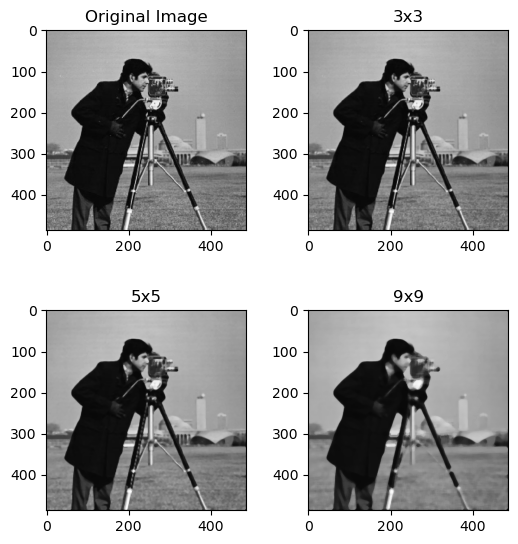

In [155]:

cameraman_image = np.array(Image.open('C:\\Users\\Hp\\Desktop\\CV assignment 1\\Images\\cameraman.jpeg').convert('L'))
cameraman_image_array = np.array(cameraman_image)
a=3
b=5
c=9
k_size = [a, b, c]


def median_filter(image, kernel_size):
    height, width = image.shape

    b=2
    pad_size = kernel_size // b

    
    padded = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    
    x = 0
    while x < width:
        y = 0
        while y < height:
            kernel = padded[y:y+kernel_size, x:x+kernel_size]
            median = np.median(kernel)
            output[y, x] = median
            y += 1
        x += 1

    return output


figure_display_size = (6, 6)
plt.figure(figsize=figure_display_size)


ax = plt.subplot(2, 2, 1)
plt.imshow(cameraman_image, cmap='gray')
plt.title('Original Image')


i = 0
while i < len(k_size):
    ksize = k_size[i]
    
    filtered_arr = median_filter(cameraman_image_array, ksize)


    ax = plt.subplot(2, 2, i+2)
    plt.imshow(filtered_arr, cmap='gray')
    plt.title('{}x{}'.format(ksize, ksize))
    
    i += 1


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.show()


# Task 6

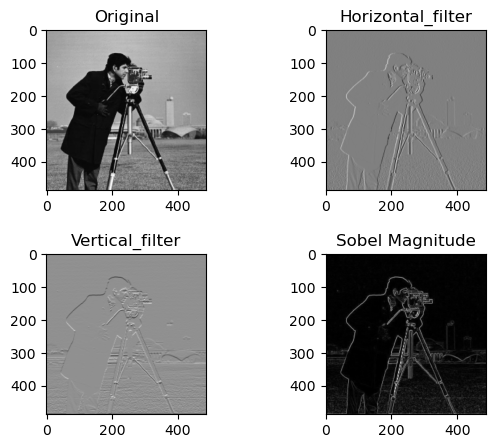

In [156]:

ip = np.array(Image.open('C:\\Users\\Hp\\Desktop\\CV assignment 1\\Images\\cameraman.jpeg').convert('L'))


Hor , ver = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) , np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])


sobel_x_img , sobel_y_img = signal.convolve2d(ip, Hor, mode='same') , signal.convolve2d(ip, ver, mode='same')


sobel_mag , sobel_dir  = np.sqrt(sobel_x_img**2 + sobel_y_img**2) , np.arctan2(sobel_y_img, sobel_x_img)


plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(sobel_x_img, cmap='gray')
plt.title('Horizontal_filter')

plt.subplot(2, 2, 3)
plt.imshow(sobel_y_img, cmap='gray')
plt.title('Vertical_filter')

plt.subplot(2, 2, 4)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel Magnitude')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.show()
